# Deep learning model

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train_sample = pd.read_csv('data/df_train_sample.csv')
df_train_sample.head()


,TransactionID,isFraud,D13,D14,D12,id_04,id_03,D6,D9,D8,...,id_28,id_38,id_35,id_37,id_15,id_36,card4,card6,ProductCD,id_12
0,2987071.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,None,None,None,None,None,None,visa,debit,W,None
1,2988706.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.583333,5.583333,...,Found,T,T,T,Found,F,visa,credit,H,Found
2,2988937.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,None,None,None,None,None,None,mastercard,debit,W,None
3,2988966.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,None,None,None,None,None,None,visa,debit,W,None
4,2988970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,None,None,None,None,None,None,visa,credit,W,None


In [3]:
X_train = df_train_sample.drop(['TransactionID', 'isFraud'], axis=1)
y_train = df_train_sample.isFraud

In [4]:
# Sklearn pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [5]:
categorical_features = ['id_33', 'id_30', 'id_34', 'DeviceInfo', 'id_16', 
       'P_emaildomain', 'R_emaildomain', 'id_31', 'DeviceType', 
       'id_29', 'id_28', 'id_38', 'id_35', 'id_37', 'id_15',
      'id_36', 'card4', 'card6', 'ProductCD', 'id_12'] 
numeric_features = [c for c in df_train_sample.columns if c not in categorical_features and c not in ['TransactionID', 'isFraud']]


In [6]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [7]:
# check the shape after preprocessing
preprocess = Pipeline(steps=[('preprocessor', preprocessor)])

In [8]:
X_train.shape

(34409, 411)

In [9]:
preprocess.fit_transform(X_train).shape

(34409, 1394)

In [10]:
input_dim = preprocess.fit_transform(X_train).shape[1]

In [11]:
# custom AUC ROC metric

import tensorflow as tf
from sklearn.metrics import roc_auc_score

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [12]:
# Keras model definition

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=input_dim))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

Using TensorFlow backend.
W1006 12:32:23.682326 140460977452800 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1006 12:32:23.696767 140460977452800 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1006 12:32:23.698337 140460977452800 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1006 12:32:23.708359 140460977452800 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensor

In [13]:
# Build Model...

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=[auroc])

W1006 12:32:23.756876 140460977452800 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1006 12:32:23.770925 140460977452800 deprecation_wrapper.py:119] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W1006 12:32:23.774044 140460977452800 deprecation.py:323] From /home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1006 12:32:23.784192 140460977452800 deprecation.py:323] From <ipython-input-11-26ff85e5fe8b>

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               357120    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 423,426
Trainable params: 423,426
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(preprocess.fit_transform(X_train), pd.get_dummies(y_train), epochs=100)

Epoch 1/100
34409/34409 [==============================] - 9s 266us/step - loss: 0.1286 - auroc: 0.9900
Epoch 2/100
34409/34409 [==============================] - 9s 266us/step - loss: 0.1166 - auroc: 0.9913
Epoch 3/100
34409/34409 [==============================] - 9s 266us/step - loss: 0.1244 - auroc: 0.9904
Epoch 4/100
34409/34409 [==============================] - 9s 267us/step - loss: 0.1171 - auroc: 0.9917
Epoch 5/100
34409/34409 [==============================] - 9s 266us/step - loss: 0.1168 - auroc: 0.9914
Epoch 6/100
34409/34409 [==============================] - 9s 266us/step - loss: 0.1164 - auroc: 0.9913
Epoch 7/100
34409/34409 [==============================] - 9s 265us/step - loss: 0.1136 - auroc: 0.9919
Epoch 8/100
34409/34409 [==============================] - 9s 266us/step - loss: 0.1183 - auroc: 0.9909
Epoch 9/100
34409/34409 [==============================] - 9s 267us/step - loss: 0.1143 - auroc: 0.9918
Epoch 10/100
34409/34409 [==============================] - 9s 2

## Validation

In [73]:
df_valid = pd.read_csv('data/df_valid.csv')
df_valid.head()


,isFraud,D13,D14,D12,id_04,id_03,D6,D9,D8,id_09,...,id_28,id_38,id_35,id_37,id_15,id_36,card4,card6,ProductCD,id_12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,visa,debit,W,None
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,visa,debit,C,None
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,0.0,...,Found,T,T,T,Found,F,american express,credit,H,NotFound
3,0.0,0.0,0.0,163.0,0.0,0.0,163.0,0.0,0.0,0.0,...,None,None,None,None,None,None,visa,credit,C,None
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,mastercard,debit,W,None


In [88]:
X_valid = df_valid.drop(['isFraud'], axis=1)
y_valid = df_valid.isFraud

In [90]:
y_true = y_valid
y_pred_proba = model.predict(preprocess.transform(X_valid))
y_pred_proba = pd.DataFrame(y_pred_proba).loc[:, 1]

In [91]:
y_pred = y_pred_proba.apply(lambda x: np.round(x))

In [92]:
from sklearn.metrics import f1_score, precision_score, recall_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1Score = f1_score(y_true, y_pred)

      
print("Summary Stats")
print("Precision = %s" % precision)
print("Recall = %s" % recall)
print("F1 Score = %s" % f1Score)

Summary Stats
Precision = 0.22241475684740078
Recall = 0.9433380749170223
F1 Score = 0.3599601954043785


In [93]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, title, Norm,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    # Compute confusion matrix 
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if Norm == True:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

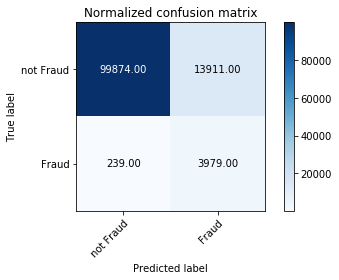

In [94]:
np.set_printoptions(precision=2)
class_names = ['not Fraud', 'Fraud']
plot_confusion_matrix(y_true, y_pred, classes=class_names, Norm=False,
                      title='Normalized confusion matrix')

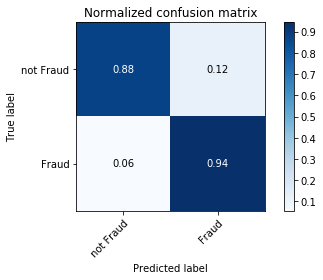

In [95]:
np.set_printoptions(precision=2)
class_names = ['not Fraud', 'Fraud']
plot_confusion_matrix(y_true, y_pred, classes=class_names, Norm=True,
                      title='Normalized confusion matrix')

In [96]:
from sklearn.metrics import roc_curve, auc

In [97]:
fpr, tpr, _ = roc_curve(y_true, y_pred_proba)

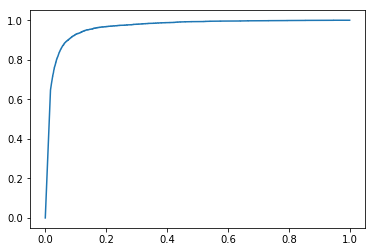

In [98]:
plt.plot(fpr, tpr)

In [100]:
auc(fpr, tpr)

0.96483405821828

## Test Prediction

In [113]:
df_test = pd.read_csv('data/df_test.csv')
df_test.shape

(506691, 412)

In [114]:
X_test = df_test.drop(['TransactionID'], axis=1)

In [115]:
y_pred_proba = model.predict(preprocess.transform(X_test))
y_pred_proba = pd.DataFrame(y_pred_proba).loc[:, 1]

In [116]:
df_preds = pd.DataFrame(df_test.TransactionID)
df_preds = pd.concat([df_preds, y_pred_proba], axis=1)

In [117]:
df_preds.columns = ['TransactionID', 'isFraud']
df_preds.shape

(506691, 2)

In [118]:
df_preds.head()

,TransactionID,isFraud
0,3664355.0,3.105767e-11
1,3664418.0,7.151639e-09
2,3664423.0,1.143229e-04
3,3664469.0,3.889354e-04
4,3665115.0,7.504455e-05


In [120]:
df_preds.to_csv('predicted.csv', index=False)